In [2]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
matplotlib.style.use('ggplot')
%matplotlib inline

In [3]:
from sklearn.decomposition import PCA

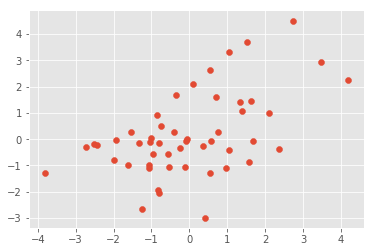

In [4]:
mu = np.zeros(2)
C = np.array([[3,1],[1,2]])

data = np.random.multivariate_normal(mu, C, size=50)
plt.scatter(data[:,0], data[:,1])
plt.show()

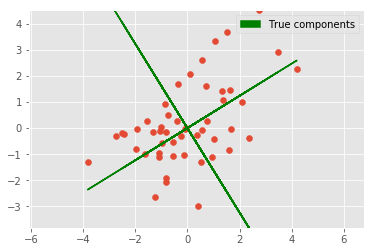

In [5]:
v, W_true = np.linalg.eig(C)

plt.scatter(data[:,0], data[:,1])
# построим истинные компоненты, вдоль которых максимальна дисперсия данных
plt.plot(data[:,0], (W_true[0,0]/W_true[0,1])*data[:,0], color="g")
plt.plot(data[:,0], (W_true[1,0]/W_true[1,1])*data[:,0], color="g")
g_patch = mpatches.Patch(color='g', label='True components')
plt.legend(handles=[g_patch])
plt.axis('equal')
limits = [np.minimum(np.amin(data[:,0]), np.amin(data[:,1])),
          np.maximum(np.amax(data[:,0]), np.amax(data[:,1]))]
plt.xlim(limits[0],limits[1])
plt.ylim(limits[0],limits[1])
plt.draw()

In [6]:


def plot_principal_components(data, model, scatter=True, legend=True):
    W_pca = model.components_
    if scatter:
        plt.scatter(data[:,0], data[:,1])
    plt.plot(data[:,0], -(W_pca[0,0]/W_pca[0,1])*data[:,0], color="c")
    plt.plot(data[:,0], -(W_pca[1,0]/W_pca[1,1])*data[:,0], color="c")
    if legend:
        c_patch = mpatches.Patch(color='c', label='Principal components')
        plt.legend(handles=[c_patch], loc='lower right')
    # сделаем графики красивыми:
    plt.axis('equal')
    limits = [np.minimum(np.amin(data[:,0]), np.amin(data[:,1]))-0.5,
              np.maximum(np.amax(data[:,0]), np.amax(data[:,1]))+0.5]
    plt.xlim(limits[0],limits[1])
    plt.ylim(limits[0],limits[1])
    plt.draw()



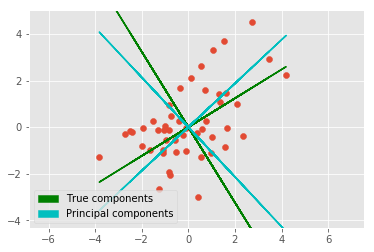

In [7]:


model = PCA(n_components=2)
model.fit(data)

plt.scatter(data[:,0], data[:,1])
# построим истинные компоненты, вдоль которых максимальна дисперсия данных
plt.plot(data[:,0], (W_true[0,0]/W_true[0,1])*data[:,0], color="g")
plt.plot(data[:,0], (W_true[1,0]/W_true[1,1])*data[:,0], color="g")
# построим компоненты, полученные с использованием метода PCA:
plot_principal_components(data, model, scatter=False, legend=False)
c_patch = mpatches.Patch(color='c', label='Principal components')
plt.legend(handles=[g_patch, c_patch])
plt.draw()



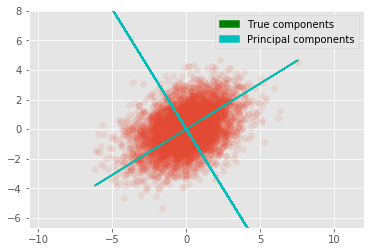

In [8]:


data_large = np.random.multivariate_normal(mu, C, size=5000)

model = PCA(n_components=2)
model.fit(data_large)
plt.scatter(data_large[:,0], data_large[:,1], alpha=0.1)
# построим истинные компоненты, вдоль которых максимальна дисперсия данных
plt.plot(data_large[:,0], (W_true[0,0]/W_true[0,1])*data_large[:,0], color="g")
plt.plot(data_large[:,0], (W_true[1,0]/W_true[1,1])*data_large[:,0], color="g")
# построим компоненты, полученные с использованием метода PCA:
plot_principal_components(data_large, model, scatter=False, legend=False)
c_patch = mpatches.Patch(color='c', label='Principal components')
plt.legend(handles=[g_patch, c_patch])
plt.draw()



# Task 1



In [10]:
from sklearn.decomposition import PCA
#from sklearn.cross_validation import cross_val_score as cv_score

from sklearn.model_selection import cross_val_score as cv_score

def plot_scores(d_scores):
    n_components = np.arange(1,d_scores.size+1)
    plt.plot(n_components, d_scores, 'b', label='PCA scores')
    plt.xlim(n_components[0], n_components[-1])
    plt.xlabel('n components')
    plt.ylabel('cv scores')
    plt.legend(loc='lower right')
    plt.show()
    
def write_answer_1(optimal_d):
    with open("pca_answer1.txt", "w") as fout:
        fout.write(str(optimal_d))
        
data = pd.read_csv('data_task1.csv')

# place your code here


In [11]:
data.shape

(3000, 80)

In [23]:
nc_models = []

d_scores = [] 
for i in range(1, 81):
    
    model = PCA(n_components=i)
    
    model.fit(data)
    v
    scores = cv_score(model, data, cv=3)
    d_scores.append(sum(scores)/3)

    
    

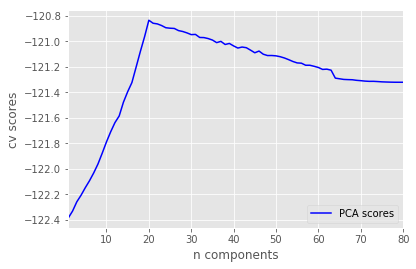

In [24]:
plot_scores(pd.DataFrame(d_scores))

In [30]:
d_scores[6]

-122.03167703760016

In [32]:
maxind = 0
maxi = d_scores[0]
print(maxi)
for i in range(1, 80):
    if(d_scores[i]>maxi):
        maxi=d_scores[i]
        maxind=i
        
print(maxind)

-122.38503320198845
19


In [33]:
def write_answer_1(optimal_d):
    with open("pca_answer1.txt", "w") as fout:
        fout.write(str(optimal_d))

In [35]:
write_answer_1(20)

# Task 2 

In [37]:
def plot_variances(d_variances):
    n_components = np.arange(1,d_variances.size+1)
    plt.plot(n_components, d_variances, 'b', label='Component variances')
    plt.xlim(n_components[0], n_components[-1])
    plt.xlabel('n components')
    plt.ylabel('variance')
    plt.legend(loc='upper right')
    plt.show()
    
def write_answer_2(optimal_d):
    with open("pca_answer2.txt", "w") as fout:
        fout.write(str(optimal_d))
        
data = pd.read_csv('data_task2.csv')

In [38]:
data.shape

(3000, 100)

In [39]:
model = PCA(n_components=100)
model.fit(data)

PCA(copy=True, iterated_power='auto', n_components=100, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [40]:
x = model.transform(data)

In [42]:
x.shape

(3000, 100)

In [49]:
var = np.var(x, axis=0)

In [50]:
var.shape

(100,)

In [66]:
var1=pd.DataFrame(sorted(var, reverse=True))

In [68]:
var1 = sorted(var, reverse=True)

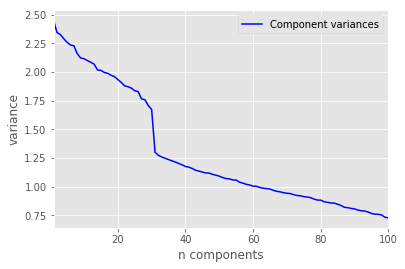

In [67]:
plot_variances(var1)


In [75]:
subs = []

for i in range(1, 100):
    subs.append(var1[i-1]-var1[i])
    
len(subs)

99

In [77]:
maxind = 0
maxi = subs[0]
print(maxi)
for i in range(1, 99):
    if(subs[i]>maxi):
        maxi=subs[i]
        maxind=i
        
print(maxind)

0.1057566243961876
29


In [78]:
write_answer_2(30)

# Task 3

In [95]:
from sklearn import datasets

def plot_iris(transformed_data, target, target_names):
    plt.figure()
    for c, i, target_name in zip("rgb", [0, 1, 2], target_names):
        plt.scatter(transformed_data[target == i, 0],
                    transformed_data[target == i, 1], c=c, label=target_name)
    plt.legend()
    plt.show()
    
def write_answer_3(list_pc1, list_pc2):
    with open("pca_answer3.txt", "w") as fout:
        fout.write(" ".join([str(num) for num in list_pc1]))
        fout.write(" ")
        fout.write(" ".join([str(num) for num in list_pc2]))

# загрузим датасет iris
iris = datasets.load_iris()
data = iris.data
target = iris.target
target_names = iris.target_names

# place your code here

In [98]:
data.shape

(150, 4)

In [97]:
means = np.mean(data, axis=0)

In [81]:
means.shape

(4,)

In [111]:

for j in range(4):
    data[:, j]=data[:, j]-means[j]

In [113]:
model = PCA(n_components=2)
model.fit(data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [114]:
x = model.transform(data)

In [116]:
meanx = np.mean(x, axis=0)

for j in range(2):
    x[:, j]=x[:, j]-meanx[j]

In [124]:
alld = np.hstack((data, x))
alld = pd.DataFrame(alld)
alld.shape

(150, 6)

In [125]:
corrs = alld.corr(method='pearson')

In [126]:
corrs

,0,1,2,3,4,5
0,1.000000,-0.117570,0.871754,0.817941,8.974018e-01,3.906044e-01
1,-0.117570,1.000000,-0.428440,-0.366126,-3.987485e-01,8.252287e-01
2,0.871754,-0.428440,1.000000,0.962865,9.978739e-01,-4.838060e-02
3,0.817941,-0.366126,0.962865,1.000000,9.665475e-01,-4.878160e-02
4,0.897402,-0.398748,0.997874,0.966548,1.000000e+00,2.158954e-16
5,0.390604,0.825229,-0.048381,-0.048782,2.158954e-16,1.000000e+00


In [130]:
for j in range(4):
    print(max(abs(corrs[j][4]), abs(corrs[j][5] ) ))

0.897401761958298
0.8252287092319988
0.9978739422413109
0.9665475167033066


In [131]:
def write_answer_3(list_pc1, list_pc2):
    with open("pca_answer3.txt", "w") as fout:
        fout.write(" ".join([str(num) for num in list_pc1]))
        fout.write(" ")
        fout.write(" ".join([str(num) for num in list_pc2]))

In [132]:
write_answer_3([1, 3, 4], [2])

# Task4 

In [135]:


from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import RandomizedPCA

def write_answer_4(list_pc):
    with open("pca_answer4.txt", "w") as fout:
        fout.write(" ".join([str(num) for num in list_pc]))

data = fetch_olivetti_faces(shuffle=True, random_state=0).data
image_shape = (64, 64)



ImportError: cannot import name 'RandomizedPCA' from 'sklearn.decomposition' (/home/kamilla/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/__init__.py)